# __Project Description__


Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

The goal of the project is to determine will the client subscribe a bank term deposit

## __Referenced papers__
1. https://ieeexplore.ieee.org/abstract/document/9065648
2. https://ieeexplore.ieee.org/abstract/document/8391441
3. https://www.researchgate.net/publication/323198261_Customer_Profiling_using_Classification_Approach_for_Bank_Telemarketing
4. https://ieeexplore.ieee.org/document/9655824

# __Exploratory Data Analysis__

First we read the dataset into dataframe. Notice that the dataset is a csv file but separated by `;`

In [58]:
import pandas as pd

df = pd.read_csv("./dataset/bank-additional/bank-additional.csv",sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Drop column __duration__, according to UCI:    

> ` this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.`

In [59]:
df.drop(columns="duration")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Getting info of dataframe. There is no null data in any of the feature. So we don't need to handle this case

In [60]:
df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### __Visualization__

Visualizing distribution of categorical features and label using pie chart. As can be seen, we have a fairly imbalanced data


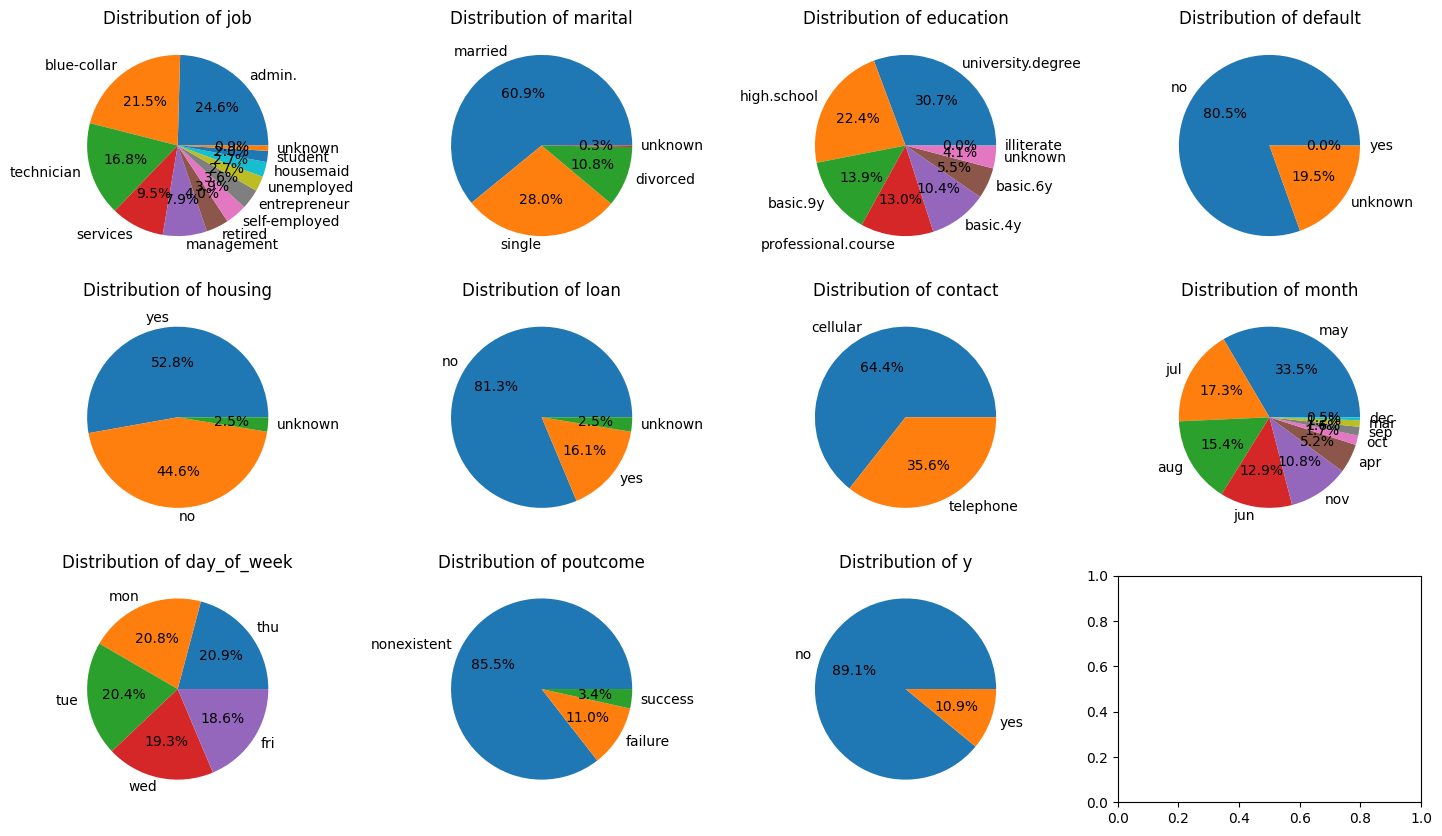

In [4]:
import matplotlib.pyplot as plt

pie_visualization = ["job", "marital", "education",
                     "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome",  "y"]

fig, axes = plt.subplots(3, 4, figsize=(18, 10))

for i, feature in enumerate(pie_visualization):
    category = df[feature].value_counts()
    axes.flat[i].set_title("Distribution of {}".format(feature))
    axes.flat[i].pie(category, labels=category.index, autopct='%1.1f%%')


Visualizing when the data is normally collected. As can be seen, most of the data is collected around May. The day_of_week is fairly balanced

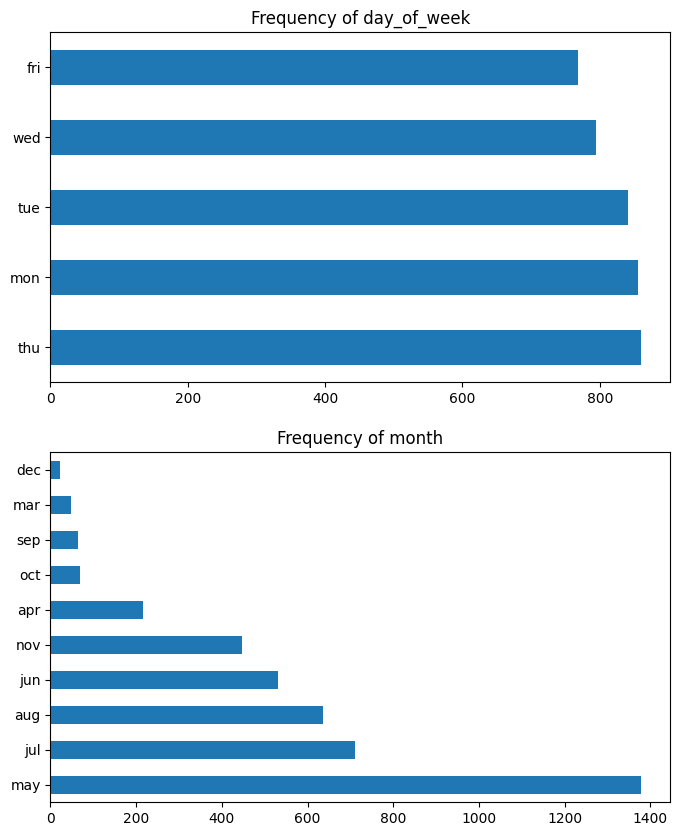

In [5]:
bar_visualization = ["day_of_week", "month"]
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
for i, ax in enumerate(axes.flat, start=0):
    feature = bar_visualization[i]
    df[feature].value_counts().plot(kind="barh", ax=ax,title="Frequency of {}".format(feature))


Visualizing correlation between numeric features    

As can be noticed from the graph, `emp.var.rate`, `nr.employed`, `euribor3m`,`cons.price.index` are highly correlated
Depending on the algorithm, we may need remove one of the above listed features. This is a **Multicollinearity** problem 

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot: >

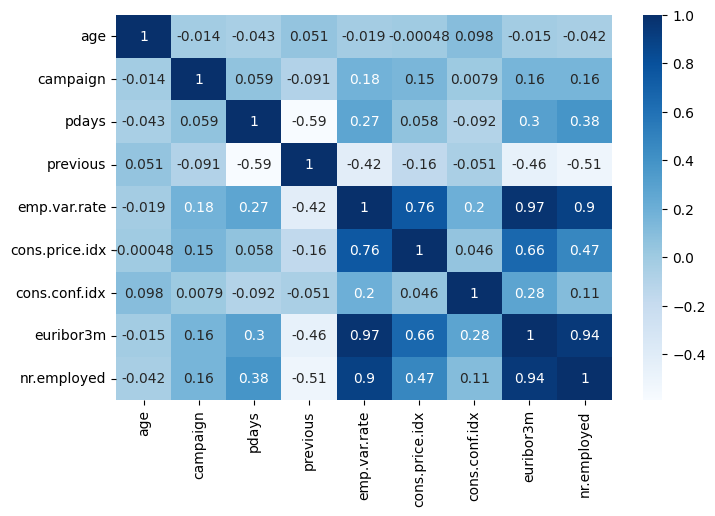

In [6]:
import seaborn as sb
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8, 5
numerical_features = ["age", "campaign", "pdays", "previous", "emp.var.rate",
                      "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

corr = df[numerical_features].corr()
print(type(corr))
sb.heatmap(corr, cmap="Blues", annot=True)


For numerical features, we are also interested in their distributions. 

As can be seen, there are lots of outliers in age, campaign, pdays, previous

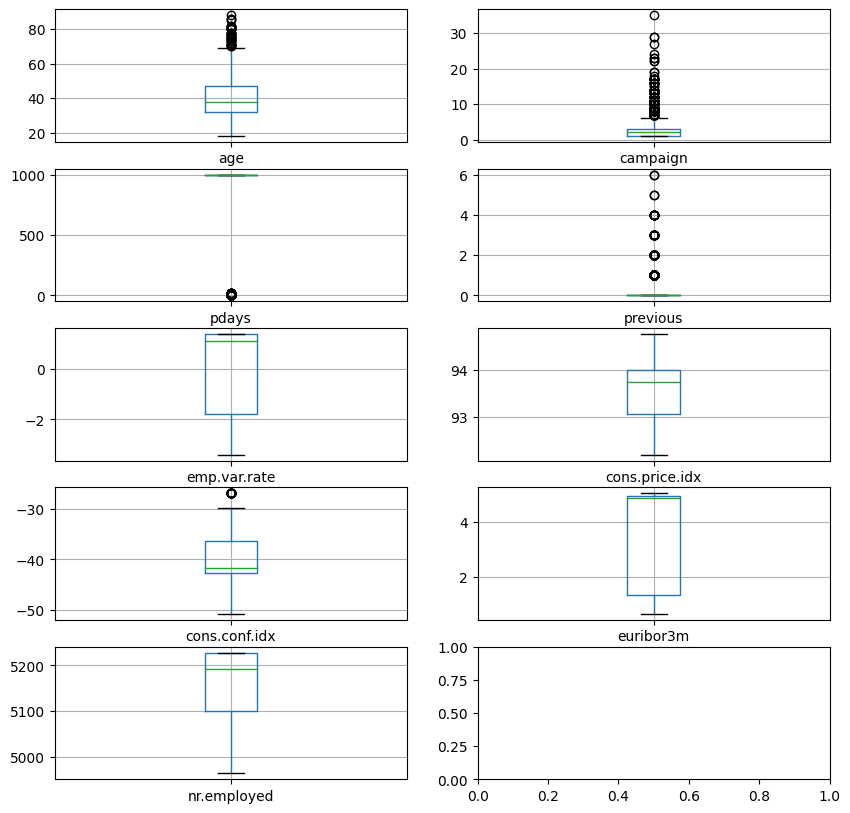

In [7]:
from math import ceil


fig, axes = plt.subplots(ceil(len(numerical_features)/2),2, figsize=(10, 10))

for i, feature in enumerate(numerical_features):
    df.boxplot(column=feature, ax=axes.flat[i])


For features with many outliers, count frequency

We notice that, people between 25 and 60 years old will likely to invest.

For `campaign`, there are many who gets contacted by bank representative by the first time, the same can be said for `pdays` and `previous`.

Potentially, we need to remove outliers from the 4 mentioned features

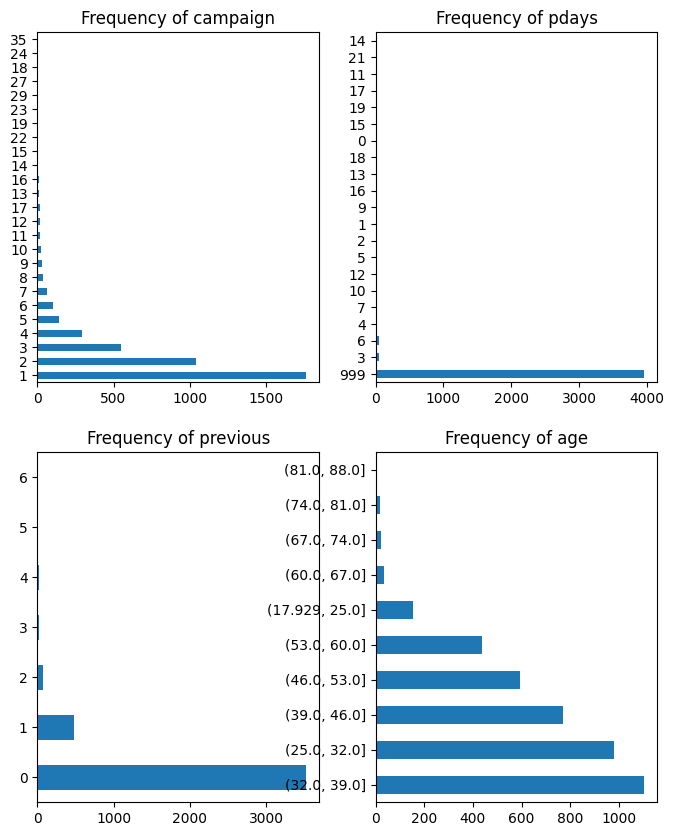

In [8]:
feature_outliers = ["campaign", "pdays", "previous"]
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

df["age"].value_counts(bins=10).plot(kind="barh", title="Frequency of age")

for i, feature in enumerate(feature_outliers):
    df[feature].value_counts().plot(
        kind="barh", ax=axes.flat[i], title="Frequency of {}".format(feature))


### __Prepare data for ML algorithms__

Some ML algorithms do not work well with categorical data, therefore, we need to convert those categorical data to number.

There are several features that are strictly __nominal__, perform **One Hot Encoder** on these features. Some features are __ordinal__, with these features, we perform **Ordinal Encoder**.

In [9]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ordering array from low to high
# The first element has lowest priority, the last element has highest priority
# This ranking is important!!
education = ["illiterate", "basic.4y", "basic.6y", "basic.9y",
             "unknown", "high.school", "professional.course", "university.degree"]

credit_default = ["yes", "unknown", "no"]

poutcome = ["failure", "nonexistent", "success"]

# 0 means no, 1 means yes
y = ["no", "yes"]

columnTransformer = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), [
         "job", "marital", "contact", "housing", "loan", "day_of_week", "month"]),
        ("OrdinalEncoder", OrdinalEncoder(
            categories=[education, credit_default, poutcome, y]),
            ["education", "default", "poutcome", "y"]),
    ],
    remainder="passthrough"
)

transformed_df = pd.DataFrame(
    columnTransformer.fit_transform(df),
    columns=columnTransformer.get_feature_names_out()
)

# Need to find out a way to feature engineering day and month
# Cannot use label encoding these data are cyclical data in nature
# Refer https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
# Also, should housing and loan be in encoded using OrdinalEncoder or OneHotEncoder?
# I feel like there is no direct ranking between them so to play it safe, I use OneHotEncoder for it

transformed_df.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Columns: 53 entries, OneHotEncoder__job_admin. to remainder__nr.employed
dtypes: float64(53)
memory usage: 1.7 MB


After running the encoder, we notice that the `dtypes` of dataframe is `float64` for all features!
Now we separate features and label

In [10]:
x = transformed_df.drop(columns=["OrdinalEncoder__y"])
y = transformed_df["OrdinalEncoder__y"]

print(x.info(verbose=False))
print(y.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Columns: 52 entries, OneHotEncoder__job_admin. to remainder__nr.employed
dtypes: float64(52)
memory usage: 1.6 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
dtypes: float64(1)
memory usage: 32.3 KB
None


# Algorithms

## Paper 2

Link: https://ieeexplore.ieee.org/abstract/document/8391441

Using C4.5 algorithm to predict if a client will subscribe a term deposit.  

In theory, decision tree should be able to work with categorical data. However, the current implementation of   
decision tree in scikit-learn 1.1 does not handle categorical data. Refer https://scikit-learn.org/1.1/modules/tree.html    

As a result, we need to use OneHotEncoder and Ordinal Encoder on the features. `transformed_df` variable is a dataframe that
has all features encoded.

There are trades off of doing this, notably higher tree depth and the time it takes for the algorithm to finish is longer...

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

%matplotlib inline
def report_result(y_pred, y_true, clf):
    cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues")
    print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       737
         1.0       0.45      0.52      0.48        87

    accuracy                           0.88       824
   macro avg       0.69      0.72      0.71       824
weighted avg       0.89      0.88      0.88       824



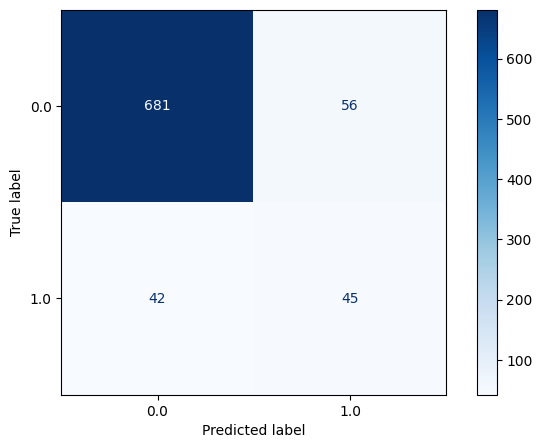

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# The following features are not used by the paper, therefore, we're not going to use these features as well
tree_dataset_x = x.drop(columns=["remainder__euribor3m", "remainder__nr.employed",
                                 "remainder__cons.price.idx", "remainder__emp.var.rate", "remainder__cons.conf.idx"], inplace=False)

# Seperate into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    tree_dataset_x, y, train_size=0.8, test_size=0.2)

# Create validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    x_train, y_train, train_size=0.6, test_size=0.4)


tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, Y_train)
y_pred = tree_clf.predict(x_test)
report_result(y_pred, y_test, tree_clf)


Hyper parameter tuning with decision tree

We do not need to scale data in order to use decision tree, thus it will be skipped.

The scoring criteria here will be `recall`, as we want to be able to find all potential customers and we do not wish to miss any of them

In [85]:
from sklearn.pipeline import Pipeline

dec_tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[
    ('dec_tree', dec_tree)])

parameters = dict(
    dec_tree__class_weight=["balanced", None],
    dec_tree__criterion=['gini', 'entropy'],
    dec_tree__max_depth=[2, 4, 6],
    dec_tree__splitter=["best", "random"],
    dec_tree__min_samples_split=[2, 4, 6],
    dec_tree__max_features=["sqrt", "log2", None]
)

tree_tuning = GridSearchCV(pipe, parameters, scoring="balanced_accuracy")
tree_tuning.fit(X_valid, Y_valid)
print("Best params", tree_tuning.best_params_)


Best params {'dec_tree__class_weight': 'balanced', 'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 4, 'dec_tree__max_features': None, 'dec_tree__min_samples_split': 6, 'dec_tree__splitter': 'best'}


Using tuned parameters on the test dataset

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       737
         1.0       0.27      0.87      0.41        87

    accuracy                           0.74       824
   macro avg       0.62      0.80      0.62       824
weighted avg       0.90      0.74      0.79       824



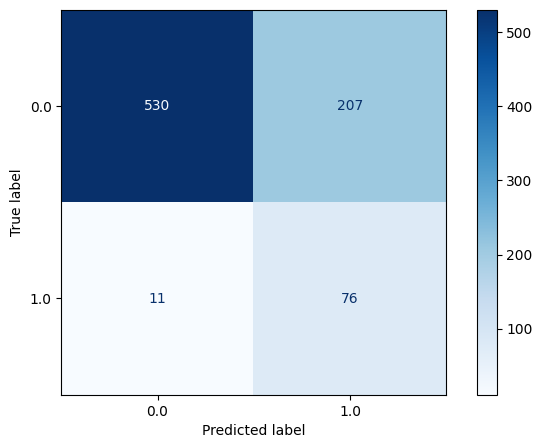

In [86]:
report_result(tree_tuning.predict(x_test), y_test, tree_tuning)